In [2]:
#import libraries required for analysis
import requests
import pandas as pd
import json 
import numpy as np

In [3]:
#function to flatten gtrends scraped data
def flatten(data,list_col):
    for column in list_col:
        flattened=pd.DataFrame(dict(data[column])).T
        columns=[str(col) for col in flattened.columns]
        flattened.columns=[column + '_' + col for col in columns]
        data=pd.concat([data,flattened], axis=1)
        data=data.drop(column,axis=1)
    return data

In [4]:
#function to manage date range for gtrends data scrape
def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

In [8]:
#actual date range for gtrends data scrape
from datetime import timedelta, date
start_dt = date(2020, 3, 29)
end_dt = date(2020, 4, 26)
trend_date = [dt.strftime("%Y%m%d") for dt in daterange(start_dt, end_dt)]

In [9]:
#country information to be scraped from gtrends
trend_country = ['AU' , 'GB' , 'US', 'ZA' , 'NZ', 'IE']

In [10]:
#loop for gtrends webscraper to take data for date ranges and selected countries
import time
temp_df = pd.DataFrame()

for country in trend_country:
    print(country)
    for date in trend_date:
        print(date)
        url = f'https://trends.google.com/trends/api/dailytrends?hl=en-GB&tz=-120&ed={date}&geo={country}&ns=15'
        request_headers = '''accept: application/json, text/plain, */*
accept-encoding: gzip, deflate, br
accept-language: en-GB,en-US;q=0.9,en;q=0.8,de;q=0.7
cookie: __utma=10102256.1757995948.1587220025.1587572712.1587583569.10; __utmz=10102256.1587583569.10.5.utmcsr=google|utmccn=(organic)|utmcmd=organic|utmctr=(not%20provided); __utmc=10102256; __utmb=10102256.20.9.1587584168364; CONSENT=YES+FR.de+V11; HSID=AA190N-5p5ubDYxHd; SSID=AaR0HndyAsqU3u1hV; APISID=d6KXQqwtlZjOr7bg/AQFdIzgMTe5Rm9kiy; SAPISID=FypQMAzc_9GSdTDf/AyOteCuqp9j1HUZci; __Secure-HSID=AA190N-5p5ubDYxHd; __Secure-SSID=AaR0HndyAsqU3u1hV; __Secure-APISID=d6KXQqwtlZjOr7bg/AQFdIzgMTe5Rm9kiy; __Secure-3PAPISID=FypQMAzc_9GSdTDf/AyOteCuqp9j1HUZci; ANID=OPT_OUT; SID=vAdmI_KWWDJeoL1YdgIl-Dp3QaURHLRb5f67BvXAfmnkDKFLf0lx_gRePR6xgs9jbTrDZw.; __Secure-3PSID=vAdmI_KWWDJeoL1YdgIl-Dp3QaURHLRb5f67BvXAfmnkDKFLFF1on_NmjqdZ-yyWlGe3PA.; SEARCH_SAMESITE=CgQIuY8B; NID=202=bmmTxRueysA9KMFGy29FLtspRHqz3avtxdcpF1mvHtZSL4WK6qowjn04wvNMloenuKA9Hknrr6Ll6qwUAoZMdE8kwVJYZiT4Pa5diJzBZ-Nv6k6LKWw8JzWEskIBvQ6a69-L5APXYkmQl9Kdzj8mALYsF0WFeZiKBRL3D38MKnZKTND4Oaz8sGpCgiVWOAfemmYU5-3IwafrnmdUozyXEoGj9s2q; __Secure-3PSIDCC=AJi4QfHPb4_GuwT5R-6msE0jZJSwajWkQJ5ZMJtaS8HRISsTdslVDPazOYK3gp8_MRnMnvZlnA; 1P_JAR=2020-4-22-19; SIDCC=AJi4QfGMwpOkQB9m1Tm7oOQ9K6L1sPWpbIpNGbHuFrN3GjAe6l9uCfNQGewf9w28nWLAH3sx8-0Y
referer: https://trends.google.com/trends/trendingsearches/daily?geo=GB
sec-fetch-dest: empty
sec-fetch-mode: cors
sec-fetch-site: same-origin
user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.113 Safari/537.36
x-client-data: CJW2yQEIo7bJAQjEtskBCImSygEIqZ3KAQjQr8oBCLywygEI7bXKAQiOusoB'''
        headers = dict([i.split(': ') for i in request_headers.split('\n')])
        gtrends_top_day_request = requests.get(url, headers=headers)
        gtrends_data=json.loads(gtrends_top_day_request.content[6:])

        gtrends_df = pd.DataFrame(gtrends_data['default']['trendingSearchesDays'][0])
        gtrends_df['country_code'] = country
        temp_df = temp_df.append(gtrends_df)
        time.sleep(0.1)
temp_df.reset_index(inplace=True)
print(temp_df.shape)

#flatten first layer
gtrends_prep = flatten(temp_df,
                       ['trendingSearches'])
#flatten second layer and keep some columns layer
gtrends_flat = flatten(gtrends_prep,
                       ['trendingSearches_title'])[['date',
                                                    'formattedDate',
                                                    'country_code',
                                                    'index',
                                                    'trendingSearches_title_query',
                                                    'trendingSearches_formattedTraffic']]


AU
20200329
20200330
20200331
20200401
20200402
20200403
20200404
20200405
20200406
20200407
20200408
20200409
20200410
20200411
20200412
20200413
20200414
20200415
20200416
20200417
20200418
20200419
20200420
20200421
20200422
20200423
20200424
20200425
20200426
GB
20200329
20200330
20200331
20200401
20200402
20200403
20200404
20200405
20200406
20200407
20200408
20200409
20200410
20200411
20200412
20200413
20200414
20200415
20200416
20200417
20200418
20200419
20200420
20200421
20200422
20200423
20200424
20200425
20200426
US
20200329
20200330
20200331
20200401
20200402
20200403
20200404
20200405
20200406
20200407
20200408
20200409
20200410
20200411
20200412
20200413
20200414
20200415
20200416
20200417
20200418
20200419
20200420
20200421
20200422
20200423
20200424
20200425
20200426
ZA
20200329
20200330
20200331
20200401
20200402
20200403
20200404
20200405
20200406
20200407
20200408
20200409
20200410
20200411
20200412
20200413
20200414
20200415
20200416
20200417
20200418
20200419
2020042

In [11]:
import numpy as np

In [12]:
#initial look at what we have
gtrends_flat['trendingSearches_title_query'].value_counts().loc[gtrends_flat['trendingSearches_title_query'].value_counts() > 6]

Coronavirus tips    15
Travis Scott        12
Happy Easter        11
John Prine          11
Valorant            11
UFC 249             11
Kim Jong Un         11
Coronavirus         10
Zoom meetings       10
Queen Elizabeth     10
Furlough             9
Good Friday          8
Easter Bunny         8
Anzac Day            7
Amber Heard          7
Good Friday 2020     7
Bernie Sanders       7
Andrew Jack          7
Extraction           7
Remdesivir           7
Boris Johnson        7
Earth Day            7
Andrea Bocelli       7
Name: trendingSearches_title_query, dtype: int64

In [13]:
#initial look at what we have
gtrends_flat.convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   date                               2967 non-null   string
 1   formattedDate                      2967 non-null   string
 2   country_code                       2967 non-null   string
 3   index                              2967 non-null   Int64 
 4   trendingSearches_title_query       2967 non-null   string
 5   trendingSearches_formattedTraffic  2967 non-null   string
dtypes: Int64(1), string(5)
memory usage: 84.1 KB


In [14]:
#initial look at what we have
gtrends_flat.head()

,date,formattedDate,country_code,index,trendingSearches_title_query,trendingSearches_formattedTraffic
0,20200329,"Sunday, 29 March 2020",AU,0,WhatsApp,100K+
1,20200329,"Sunday, 29 March 2020",AU,1,Ben Cousins,100K+
2,20200329,"Sunday, 29 March 2020",AU,2,Coronavirus tips,100K+
3,20200329,"Sunday, 29 March 2020",AU,3,Moratorium,100K+
4,20200329,"Sunday, 29 March 2020",AU,4,Coronavirus Australia app,50K+


In [15]:
#add a date time
gtrends_flat['date1'] = pd.to_datetime(gtrends_flat['date'])

In [16]:
gtrends_flat.head()

,date,formattedDate,country_code,index,trendingSearches_title_query,trendingSearches_formattedTraffic,date1
0,20200329,"Sunday, 29 March 2020",AU,0,WhatsApp,100K+,2020-03-29
1,20200329,"Sunday, 29 March 2020",AU,1,Ben Cousins,100K+,2020-03-29
2,20200329,"Sunday, 29 March 2020",AU,2,Coronavirus tips,100K+,2020-03-29
3,20200329,"Sunday, 29 March 2020",AU,3,Moratorium,100K+,2020-03-29
4,20200329,"Sunday, 29 March 2020",AU,4,Coronavirus Australia app,50K+,2020-03-29


In [18]:
#add a number corresponding to the week within which the opservation occured
gtrends_flat['week'] = gtrends_flat['date'].apply(lambda x: pd.Period(x).week)

In [19]:
#check keys
gtrends_flat.keys()

Index(['date', 'formattedDate', 'country_code', 'index',
       'trendingSearches_title_query', 'trendingSearches_formattedTraffic',
       'date1', 'week'],
      dtype='object')

In [20]:
#arrange headers
gtrends_flat = gtrends_flat[['date1',  'formattedDate', 'week','country_code', 'index', 'trendingSearches_title_query', 'trendingSearches_formattedTraffic']]

In [21]:
gtrends_flat

,date1,formattedDate,week,country_code,index,trendingSearches_title_query,trendingSearches_formattedTraffic
0,2020-03-29,"Sunday, 29 March 2020",13,AU,0,WhatsApp,100K+
1,2020-03-29,"Sunday, 29 March 2020",13,AU,1,Ben Cousins,100K+
2,2020-03-29,"Sunday, 29 March 2020",13,AU,2,Coronavirus tips,100K+
3,2020-03-29,"Sunday, 29 March 2020",13,AU,3,Moratorium,100K+
4,2020-03-29,"Sunday, 29 March 2020",13,AU,4,Coronavirus Australia app,50K+
...,...,...,...,...,...,...,...
2962,2020-04-26,"Sunday, 26 April 2020",17,IE,3,Priti Patel,2K+
2963,2020-04-26,"Sunday, 26 April 2020",17,IE,4,Alinity,2K+
2964,2020-04-26,"Sunday, 26 April 2020",17,IE,5,Kristin Cavallari,2K+
2965,2020-04-26,"Sunday, 26 April 2020",17,IE,6,Extraction Review,1K+


In [22]:
#make the search traffic volume numeric
gtrends_flat['Traffic_num'] = pd.to_numeric(gtrends_flat['trendingSearches_formattedTraffic'].apply(lambda x:
                                                        x.replace("K+", "000") 
                                                        if 'K' in x 
                                                        else x.replace("M+", "000000")))

In [23]:
gtrends_traffic = gtrends_flat.sort_values(by=['Traffic_num'],ascending = False)
gtrends_traffic.head()

,date1,formattedDate,week,country_code,index,trendingSearches_title_query,trendingSearches_formattedTraffic,Traffic_num
1646,2020-04-25,"Saturday, 25 April 2020",17,US,0,Kim Jong Un,10M+,10000000
1526,2020-04-19,"Sunday, 19 April 2020",16,US,0,Coronavirus tips,10M+,10000000
1211,2020-04-03,"Friday, 3 April 2020",14,US,0,Coronavirus tips,10M+,10000000
1607,2020-04-23,"Thursday, 23 April 2020",17,US,1,NFL Draft,10M+,10000000
1151,2020-03-31,"Tuesday, 31 March 2020",14,US,0,Dame Jean Macnamara,10M+,10000000


In [25]:
#load population table
popdata2018 = pd.read_csv('country_pops.csv',index_col='country_code')
popdata2018

,popData2018
country_code,
AU,24992369
NZ,4885500
GB,66488991
US,327167434
ZA,57779622


In [26]:
#create traffic per capita column
en_world_sentiment = gtrends_traffic.merge(popdata2018, left_on='country_code', right_index = True)
en_world_sentiment['traffic_perc_pop'] = (en_world_sentiment['Traffic_num']/en_world_sentiment['popData2018'])*100
en_world_sentiment.head()

,date1,formattedDate,week,country_code,index,trendingSearches_title_query,trendingSearches_formattedTraffic,Traffic_num,popData2018,traffic_perc_pop
1646,2020-04-25,"Saturday, 25 April 2020",17,US,0,Kim Jong Un,10M+,10000000,327167434,3.056539
1526,2020-04-19,"Sunday, 19 April 2020",16,US,0,Coronavirus tips,10M+,10000000,327167434,3.056539
1211,2020-04-03,"Friday, 3 April 2020",14,US,0,Coronavirus tips,10M+,10000000,327167434,3.056539
1607,2020-04-23,"Thursday, 23 April 2020",17,US,1,NFL Draft,10M+,10000000,327167434,3.056539
1151,2020-03-31,"Tuesday, 31 March 2020",14,US,0,Dame Jean Macnamara,10M+,10000000,327167434,3.056539


In [28]:
#filter for search volumes above 0.4% of pupulation and add a new per capita column for the grouped search volumes and over time
test = en_world_sentiment.loc[en_world_sentiment['traffic_perc_pop'] > 0.4].groupby(['date1',
                                                                                      'country_code',
                                                                                      'week',
                                                                                      'popData2018']).agg({'trendingSearches_title_query': (list),
                                                                                                           'Traffic_num':'sum',
                                                                                                           'trendingSearches_formattedTraffic':(list)}).reset_index()
test['agg_traf_per_pop'] = (test['Traffic_num'] /test['popData2018'])*100


,date1,country_code,week,popData2018,trendingSearches_title_query,Traffic_num,trendingSearches_formattedTraffic,agg_traf_per_pop
0,2020-03-29,AU,13,24992369,"[WhatsApp, Ben Cousins, Coronavirus tips, Mora...",400000,"[100K+, 100K+, 100K+, 100K+]",1.600489
1,2020-03-29,NZ,13,4885500,[Coronavirus tips],20000,[20K+],0.409375
2,2020-03-29,US,13,327167434,[Joe Diffie],5000000,[5M+],1.528269
3,2020-03-30,AU,14,24992369,"[ATO, Job keeper]",300000,"[200K+, 100K+]",1.200366
4,2020-03-30,GB,14,66488991,[Houseparty],1000000,[1M+],1.504008


In [202]:
#sort for vizulisation and over time
test2 = test.sort_values(by=['country_code','week','agg_traf_per_pop'],ascending=True)
test2.loc[test2['date1'] == '2020-04-15']

,date1,country_code,week,popData2018,trendingSearches_title_query,Traffic_num,trendingSearches_formattedTraffic,agg_traf_per_pop
44,2020-04-15,GB,16,66488991,[Captain Tom],1000000,[1M+],1.504008
45,2020-04-15,NZ,16,4885500,[Calculator],20000,[20K+],0.409375
46,2020-04-15,US,16,327167434,[IRS stimulus check portal],10000000,[10M+],3.056539
47,2020-04-15,ZA,16,57779622,[Thank you coronavirus helpers],500000,[500K+],0.865357


# 

In [198]:
# en_world_sentiment = gtrends_x.loc[gtrends_x['Traffic_num'] 
#                                    > 500000].groupby(['country_code'])
# [(i, j.groupby('date').agg({'trendingSearches_title_query': (list), 'Traffic_num':'sum'})) for i,j in en_world_sentiment][0]
# # .agg({'trendingSearches_title_query': (list), 'Traffic_num':'sum'})

In [ ]:
# en_AU_sentiment = gtrends_x.loc[gtrends_x['Traffic_num'] 
#                                    > 500000].groupby(['date',
#                                                     'week']).agg({'trendingSearches_title_query': (list),
#                                                                          'Traffic_num':'sum'})
# en_AU_sentiment

In [32]:
#import library for vizuals
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


<Figure size 1080x360 with 0 Axes>

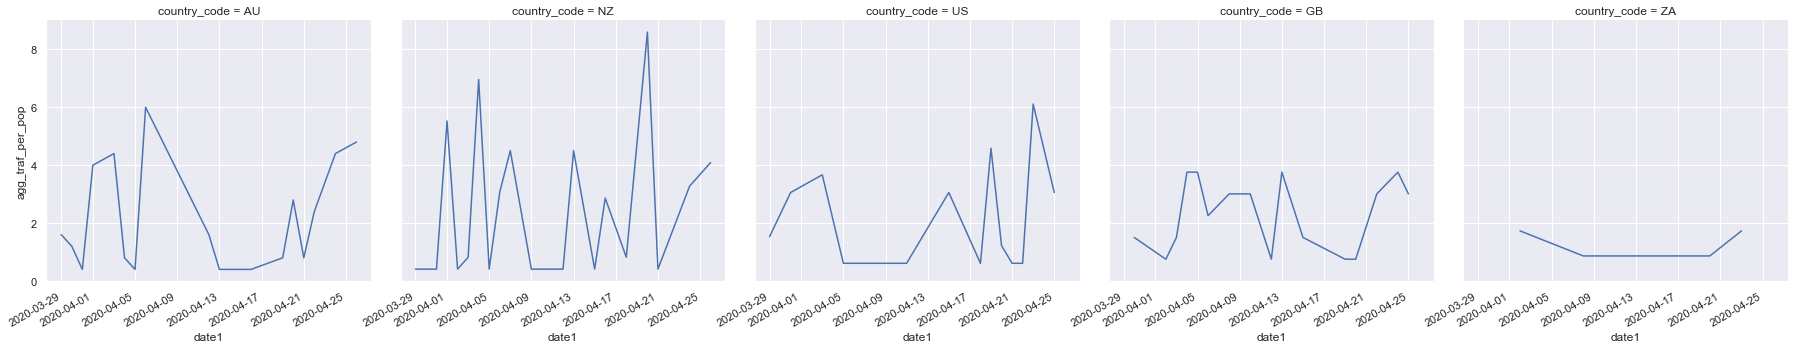

In [100]:
#plot countries search volumes ==> could not manage to annoted with what the actualy search words where
plt.figure(figsize=(15, 5))
sns.relplot(x="date1",
            y='agg_traf_per_pop',
            col="country_code",
            kind="line",
            data=test.reset_index()).fig.autofmt_xdate()


In [34]:
# popdata2018 = pd.read_csv('country_pops.csv',index_col='country_code')
# popdata2018

In [36]:
# gtrends_pop['search_rat'] = (gtrends_pop['Traffic_num']/gtrends_pop['popData2018'])*100

In [38]:
# gtrends_pop.head()

In [40]:
test.head()

,date1,country_code,week,popData2018,trendingSearches_title_query,Traffic_num,trendingSearches_formattedTraffic,agg_traf_per_pop
0,2020-03-29,AU,13,24992369,"[WhatsApp, Ben Cousins, Coronavirus tips, Mora...",400000,"[100K+, 100K+, 100K+, 100K+]",1.600489
1,2020-03-29,NZ,13,4885500,[Coronavirus tips],20000,[20K+],0.409375
2,2020-03-29,US,13,327167434,[Joe Diffie],5000000,[5M+],1.528269
3,2020-03-30,AU,14,24992369,"[ATO, Job keeper]",300000,"[200K+, 100K+]",1.200366
4,2020-03-30,GB,14,66488991,[Houseparty],1000000,[1M+],1.504008


In [192]:
#plot countries search volumes by title and country
test_word = en_world_sentiment.loc[en_world_sentiment['traffic_perc_pop'] > 1].groupby(['trendingSearches_title_query',
                                                                                          'country_code',
                                                                                          'popData2018']).agg({'Traffic_num':'sum',
                                                                                                           'trendingSearches_formattedTraffic':(list)}).reset_index()
test_word['agg_traf_per_pop'] = (test_word['Traffic_num'] /test_word['popData2018'])*100
# test_word.sort_values(by=['country_code','agg_traf_per_pop'],ascending=False).head(60)

In [193]:
test_word2 = test_word.sort_values(by=['agg_traf_per_pop','country_code'],ascending=False)
test_word2.head()

,trendingSearches_title_query,country_code,popData2018,Traffic_num,trendingSearches_formattedTraffic,agg_traf_per_pop
8,Coronavirus,NZ,4885500,600000,"[200K+, 200K+, 200K+]",12.281240
11,Coronavirus tips,US,327167434,30000000,"[10M+, 10M+, 10M+]",9.169617
7,Coronavirus,GB,66488991,6000000,"[2M+, 2M+, 2M+]",9.024050
10,Coronavirus tips,NZ,4885500,300000,"[200K+, 100K+]",6.140620
9,Coronavirus tips,GB,66488991,4000000,"[2M+, 2M+]",6.016034


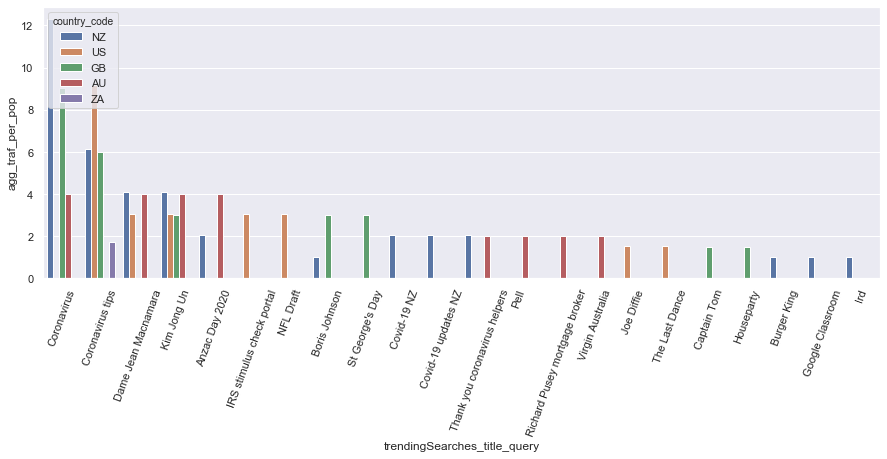

In [197]:
#plot most commonly searched words by countries
plt.figure(figsize=(15, 5))
sns.barplot(x="trendingSearches_title_query",
            y="agg_traf_per_pop",orient='v' ,
            hue="country_code",
            data=test_word2)

plt.xticks(rotation=70)

g.fig.autofmt_xdate()